## First approach using MPI: blocking partitioning


#### MPI_Gather

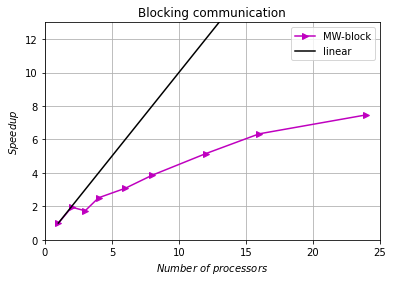

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mpi_data = np.loadtxt('Mandelbrot_Mpi/Data/01speedup_mpi_block.dat')

#plt.figure(figsize=(15,15))
plt.subplot(111)
plt.plot(mpi_data[:,0], mpi_data[:,1], 'm>-', label='MW-block')
plt.plot(mpi_data[:,0], mpi_data[:,0], 'k', label='linear')
plt.xlim(0,25)
plt.ylim(0,13)
plt.xlabel('$Number \ of \ processors$')
plt.ylabel('$Speedup$')
plt.title('Blocking communication')

plt.legend()
plt.grid()
plt.show()


### CPU time per line

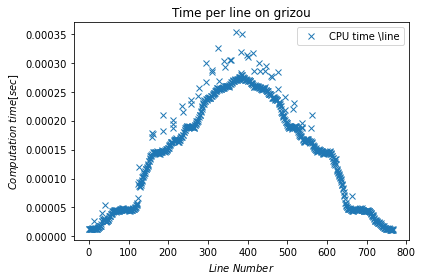

In [2]:
c_data = np.loadtxt('Mandelbrot_C/Data/time_per_line.dat')

#plt.figure(figsize=(15,15))
plt.subplot(111)
plt.plot(c_data[:,0], c_data[:,1], 'x', label='CPU time \line')
plt.xlabel('$Line \ Number$')
plt.ylabel('$Computation \ time [sec]$')
plt.title('Time per line on grizou')

plt.legend()
#plt.grid()
plt.show()

## Second approach using MPI: interlacing lines


#### MPI_Send MPI_Recv

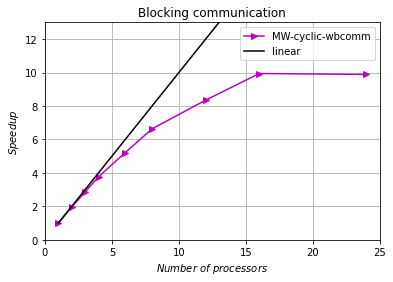

In [3]:
# cyclic with blocking communication
mpi_data2 = np.loadtxt('Mandelbrot_Mpi/Data/02speedup_mpi_cyclic_wbcomm.dat')

#plt.figure(figsize=(15,5))
plt.subplot(111)
plt.plot(mpi_data2[:,0], mpi_data2[:,1], 'm>-', label='MW-cyclic-wbcomm')
plt.plot(mpi_data2[:,0], mpi_data2[:,0], 'k', label='linear')
plt.xlim(0,25)
plt.ylim(0,13)
plt.xlabel('$Number \ of \ processors$')
plt.ylabel('$Speedup$')
plt.title('Blocking communication')

plt.legend()
plt.grid()

plt.show()

#### MPI_Isend MPI_Irecv

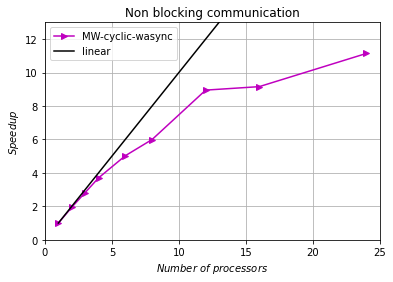

In [4]:
# cyclic with non blocking communication
mpi_data3 = np.loadtxt('Mandelbrot_Mpi/Data/03speedup_mpi_cyclic_wasync.dat')

plt.subplot(111)
plt.plot(mpi_data3[:,0], mpi_data3[:,1], 'm>-', label='MW-cyclic-wasync')
plt.plot(mpi_data[:,0], mpi_data[:,0], 'k', label='linear')
plt.xlim(0,25)
plt.ylim(0,13)
plt.xlabel('$Number \ of \ processors$')
plt.ylabel('$Speedup$')
plt.title('Non blocking communication')

plt.legend()
plt.grid()

plt.show()

#### MPI_pack MPI_unpack

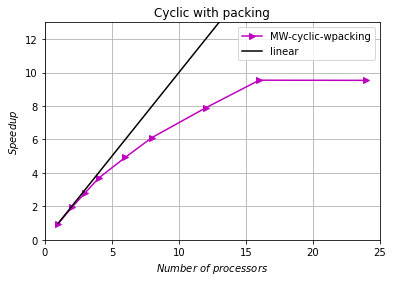

In [5]:
# cyclic with data packing
mpi_data4 = np.loadtxt('Mandelbrot_Mpi/Data/04speedup_mpi_cyclic_wpacking.dat')

plt.subplot(111)
plt.plot(mpi_data4[:,0], mpi_data4[:,1], 'm>-', label='MW-cyclic-wpacking')
plt.plot(mpi_data[:,0], mpi_data[:,0], 'k', label='linear')
plt.xlim(0,25)
plt.ylim(0,13)
plt.xlabel('$Number \ of \ processors$')
plt.ylabel('$Speedup$')
plt.title('Cyclic with packing')

plt.legend()
plt.grid()

plt.show()

#### MPI comparison

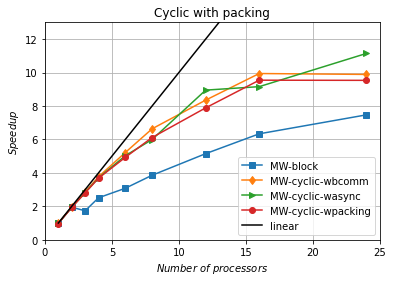

In [6]:

plt.subplot(111)
plt.plot(mpi_data[:,0], mpi_data[:,1], 's-', label='MW-block')
plt.plot(mpi_data2[:,0], mpi_data2[:,1], 'd-', label='MW-cyclic-wbcomm')
plt.plot(mpi_data3[:,0], mpi_data3[:,1], '>-', label='MW-cyclic-wasync')
plt.plot(mpi_data4[:,0], mpi_data4[:,1], 'o-', label='MW-cyclic-wpacking')
plt.plot(mpi_data[:,0], mpi_data[:,0], 'k', label='linear')
plt.xlim(0,25)
plt.ylim(0,13)
plt.xlabel('$Number \ of \ processors$')
plt.ylabel('$Speedup$')
plt.title('Cyclic with packing')

plt.legend()
plt.grid()

plt.show()